<h3>Lab 6</h3>

# Let it Rain!

<div>
<img src="rainfall-deciles.png" width="700">
</div>

<small>Source: [120 Years of Australian Rainfall](http://www.bom.gov.au/climate/history/rainfall/), Bureau of Meteorology</small>

As an "oasis" on the bottom corner of a desert, the Western Australian southwest region, including Perth, is at high risk from any declines in rainfall.

The 2019 rainfall map \(shown above\) paints the worst picture for Australian rainfall in 100 years! 2021/2 don't look as bad. This year to year variation is why it's important to consider long term trends.

In this lab, we will examine raw data from the Bureau of Meteorology going back over half a century, focussing specifically on the Perth region, and see if there are any trends we can observe for ourselves.

While we have access to a relatively small period of time geologically speaking, its a very important period of time from the perspective of man-made climate change. It will be interesting to see whether, even in such a short period of time, we can observe any trends.



## Data Acquisition and Inspection

The Australian Government's *Bureau of Meteorology (BOM)* provides a wealth of climate data through its *Climate Data Online* service.

* Find the _monthly observations rainfall data_ for Perth, WA.

You should see a number of weather stations in the Perth area. Notice that when you select a station, a graph is provided that indicates over what timespan data from that station is available, and how complete the data is.

> _Q: Which station has the longest record of data available?_
>
> _Which station has a complete record for the longest period?_



* Download the data for the Midland and Perth Airport stations to your computer.

Data is typically accompanied by a 'README' file or similar, explaining what is in the files.

* Read the `..Note.txt` file for one of the datasets. Look out in particular for:
  * information on the data fields (columns) contained in the files
  * information on missing data
  * information on quality of the data

As you read the file, start to think about what you might need to do when inspecting and cleaning the data.

- Inspect the data to see if it matches what you expect to see from the Note.


You will have noticed from the Note file there are two formats for the monthly data. We will use the 1 month per line (6 column) format for this lab.

* Upload the csv files for the relevant tables to CoCalc, and set up constants to point to the data.

If you have the correct files they should not be more than 50KB. Check this by viewing the directory listing in CoCalc.

- Import `numpy` and `pyplot`.

Notice from the website that the filenames are made up of a number of components. The following constants are provided for the files we use.

In [1]:
STATIONS = {"Airport": "009021", "Midland": "009025"}
MONTHLY_RAIN = "IDCJAC0001"
PER_LINE = 1

### The `csv` library

So far we have parsed csv files ourselves. As this is a common task, a package called `csv` is provided in the python standard library.

Look up the documentation for the csv module in the latest version of the Python Standard Library documentation.

* Import the `csv` package, and use a csv `reader` to read the Perth Airport data into a list of lists.

*Hint: the reader is an iterable, so it can be used with `list()` to create a list of lists.*

How many lines of data are there? 

* Print out the first 5 and last 5 lines to check that they are as you would expect.


* Write a function `monthly_rain(site)` that returns the one month per line monthly rainfall for the named site.

For example:
```
monthly_rain("Airport")[:4]
```
```
[['Product code',
  'Station number',
  'Year',
  'Month',
  'Monthly Precipitation Total (millimetres)',
  'Quality'],
 ['IDCJAC0001', '009021', '1944', '05', '110.6', 'Y'],
 ['IDCJAC0001', '009021', '1944', '06', '77.5', 'Y'],
 ['IDCJAC0001', '009021', '1944', '07', '177.4', 'Y']]
 ```

Define constants for the index of each field (column). This should then allow you to do something like the following.

```
row = monthly_rain("Airport")[1]
print("The rainfall in {}/{} for station {} was {} mm.".format(row[MONTH], row[YEAR], row[STATION], row[RAINFALL]))
```
```
The rainfall in 05/1944 for station 009021 was 110.6 mm.
```

The constants should be used in subsequent work, rather than the numbers. (Why?)

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
MONTH = 3
YEAR = 2
STATION = 1
RAINFALL = 4
FLAG = 5

In [4]:
def monthly_rain(site):
    file_name = MONTHLY_RAIN + "_" + STATIONS[site] + "_Data1.csv"
    with open(file_name) as csvfile:
        csv_reader = csv.reader(csvfile,delimiter= ",")
        #my_list = [list(row) for row in csv_reader]
        my_list = list(csv_reader)
    return my_list

In [5]:
monthly_rain("Airport")[:5]

[['Product code',
  'Station number',
  'Year',
  'Month',
  'Monthly Precipitation Total (millimetres)',
  'Quality'],
 ['IDCJAC0001', '009021', '1944', '05', '110.6', 'Y'],
 ['IDCJAC0001', '009021', '1944', '06', '77.5', 'Y'],
 ['IDCJAC0001', '009021', '1944', '07', '177.4', 'Y'],
 ['IDCJAC0001', '009021', '1944', '08', '108.3', 'Y']]

In [6]:
row = monthly_rain("Airport")[1]
print("The rainfall in {}/{} for station {} was {} mm.".format(row[MONTH], row[YEAR], row[STATION], row[RAINFALL]))

The rainfall in 05/1944 for station 009021 was 110.6 mm.


## Data Cleaning and Conversion

Let's start by examining the data from the Perth Airport.

If you have not used _list comprehensions_ in a previous unit, ensure you view the videos on list comprehensions on the Live Unit Outline. Each of the following should take one line of code.

- Use a list comprehension to count how many rows have the flag 'Y'. Print the results.
- Use a list comprehension to count how many rows have the flag 'N'.
- Use a list comprehension to count how many rows have the flag '' (empty).
- Use a list comprehension to select and count the rows in which the rainfall field is either empty or does not start with a numerical character.

_Hint: Use a list comprehension to create a list of rows and `len()` to give the count._

- Print the percentage of rows that have a 'Y' flag to 3 significant figures (1 decimal place).

How would you judge the completeness and reliability of the airport data to be from these tests? Repeat for the midland data.

What other tests might you want to do to check for completeness?

- Use a list comprehension (one line of code) to extract a list that contains all the rows in the airport data that have a rainfall field that is nonempty and starts with a numerical character, and in which the flag is in 'YN' (that is either 'Y' or 'N').

* Write a function `valid_data(site)` that returns a pair `(header, body)` where:
  * `header` is the list of table headings for the site
  * `body` is the list of lists of data (minus the headings) for the site, with any invalid data (as specified above) removed


In [7]:
airport_data = monthly_rain("Airport") 

In [8]:
flag_y = [row for row in airport_data if row[FLAG] == "Y"]
len(flag_y)

922

In [9]:
flag_n = [row for row in airport_data if row[FLAG] == "N"]
len(flag_n)

18

In [10]:
flag_empty = [row for row in airport_data if row[FLAG] == ""]
len(flag_empty)

0

In [11]:
flag_rainfall_empty = [row for row in airport_data if row[RAINFALL] == "" or not row[RAINFALL][0].isnumeric()]
flag_rainfall_empty

[['Product code',
  'Station number',
  'Year',
  'Month',
  'Monthly Precipitation Total (millimetres)',
  'Quality']]

In [12]:
print(round((len(flag_y)/len(airport_data))*100,1))

98.0


In [13]:
def valid_data(site):
    raw_data = monthly_rain(site) 
    body = [row for row in raw_data if (row[RAINFALL] != "" and row[RAINFALL][0].isnumeric()) 
                  and (row[FLAG] == "Y" or row[FLAG] == "N")]
    header = raw_data [0]
    return (header,body)

## NumPy Arrays and Data types

In order to plot the rainfall data, we would like to have an array of months, and a corresponding array of rainfalls for those months. (By a month here, we mean a particular month in time, such as January 1957, not the concept of 'all Januaries'.  More on this later.)

We have already extracted all the lines of data that have numerical data in the rainfall field and a valid flag. Now we want to get out the contents of the relevant fields, and store them in arrays of the correct type.

> _Q: What data types would you choose?_

#### Pre-allocating arrays

We'll use a loop to extract the data directly into arrays (we won't use an 'accumulator' list). As we saw in the lectures, to do this efficiently, we need to pre-allocate arrays of the right size.

* Using numpy's `full` method, define arrays for:
  * year numbers, with type 'int'
  * month numbers, with type 'int'
  * rainfall, with type `float`
  * flags, with type `boolean` (True for 'Y', False for 'N')
 
* Using `enumerate()`, write a loop to store the above fields from each line of your list of cleaned data in the corresponding array.

Your arrays should therefore begin with:
```
[1944 1944 1944 1944 1944...]
[5 6 7 8 9...]
[110.6  77.5 177.4 108.3  53.1...]
[ True  True  True  True  True...]
```

In [16]:
header, test = valid_data("Airport")

In [15]:
year_array = np.full(len(test),0,dtype= int)
month_array = np.full(len(test),0,dtype= int)
rainfall_array = np.full(len(test),0,dtype= float)
flags_array = np.full(len(test),True,dtype= bool)

In [16]:
def bool_convert (value):
    if value == "Y":
        return True
    else:
        return False 
    

In [17]:
for count, item in enumerate(test):
    year_array[count] = item[YEAR]
    month_array[count] = item[MONTH]
    rainfall_array[count] = item[RAINFALL]
    flags_array[count] = bool_convert(item[FLAG])
    

In [18]:
print(rainfall_array[:5])

[110.6  77.5 177.4 108.3  53.1]


## Timestamps and Datetimes

Recall that our goal is to plot rainfall against a timepoint in history. Having separate years and months is therefore not very satisfactory.

A _**timestamp**_ refers to a particular moment in time. Timestamps are needed in many contexts, and different platforms have adopted different ways of representing moments in time. In Unix, for example, it is represented as the number of seconds since 00:00:00 UTC (equivalent to GMT) on 1st January 1970.

Notice that specifying a timestamp (at a resolution of less than one day) requires a date and a time of day. Timestamps are therefore also often referred to as _**datetimes**_.

### numpy `datetime64`

The python ecosystem contains a (confusing) number of modules for dealing with dates and times (again a consequence of the way it evolved), including the modules `datetime`, `time` and `calendar` (we will see another later).

numpy also has its own [datetime type](https://numpy.org/doc/stable/reference/arrays.datetime.html), called `datetime64` (indicating its size, and distinguishing it from the `datetime` module).

numpy's datetime has a fixed-size representation (a 64-bit integer) which allows it to be used efficiently in standard numpy arrays. This means that it has a precision limit (like all digital representations), and there is a trade-off between the 'bigness' of timespan that can be represented, and the 'smallness' of the time interval (or precision) that can be represented.

To make it most useful, numpy lets you choose the time units it represents, from *attoseconds* (for particle physicists?) through to *years* (for geologists?). This is explained in the section [Datetime Units](https://numpy.org/doc/stable/reference/arrays.datetime.html?highlight=datetime#datetime-units) which provides a table showing the timespan that can be used for each unit size. 

> For those less familiar with [scientific notation](https://en.wikipedia.org/wiki/Scientific_notation),  1.0e12 (or just 1e12) means $1 \times 10^{12}$ or 1 followed by 12 zeros. So 1e12 years is 1 trillion years. On the other hand, 1 picosecond is 1e-12, or $\frac{1}{10^{12}}$, seconds, or one trillionth of a second.

Have a look at this table now.

> _Q: Our data span is "in the order of" 200 years. What is the smallest precision we could use to represent time using `datetime64`?_
>
> _Conversely, the time intervals of our data are of the order of 1 month. What is the maximum timespan for which we could record data at that precision?_

You should find that it is far smaller, or bigger, than we need.


 In fact, the limits are far more than we will ever need for our time-series data, but understanding why it works this way makes it easy to understand the reason for including date or time units when we create a `datetime64` object.

#### Creating datetime objects

To see how `datetime64` can be used as a numerical and array type, and the power of doing so, try the following. (Each should only take one line.)

* Assign today's date to a variable `today` (use the ISO 8601 format YYYY-MM-DD).

Print `today` and its `dtype`. What dtype has it defaulted to, and why?

 * Try the same thing with `year_today` using the format YYYY. What do you notice?
 * Repeat `year_today` but this time use the second argument to force the units to be days.

What do you notice when you print `year_today`? What day does numpy use for the year when you create it with higher (that is, daily) precision?

* Try casting `today` to a year, and back to a day. What do you find?



In [19]:
today = np.datetime64('2022-09-14')

In [20]:
today.dtype

dtype('<M8[D]')

In [21]:
year_today = np.datetime64('2022')
year_today.dtype

dtype('<M8[Y]')

In [22]:
year_today = np.datetime64('2022','D')
year_today.dtype

dtype('<M8[D]')

In [23]:
today = np.datetime64(today,'Y')
today

numpy.datetime64('2022')

In [24]:
today = np.datetime64(today,'D')
today

numpy.datetime64('2022-01-01')

#### Array's of datetimes

  * Use `arange()` to create an array of dates from January 1st this year to December 31st.

Hint: You simply specify the array's `dtype` like any other data type.

  * Print the last day of the array to check you used the right bounds.
  * How many days will there be this year?


In [25]:
dates = np.arange('2022-01-01', '2023-01-01',dtype='datetime64[D]')
len(dates)

365

#### Arithmetic on datetimes

  * Calculate (using one line of arithmetic on datetimes, not converting to another type or searching an array) what day of the year it is today.
 
Hint: You already have a variable holding today's date, and a variable holding the first day of the year. 
  * How many days are there to go this year?
  * Print the date in a week's time.


In [26]:
day_of_year = today + 1 - dates[0]
day_of_year

numpy.timedelta64(1,'D')

In [27]:
day_to_go = dates[-1] - today
day_to_go

numpy.timedelta64(364,'D')

In [28]:
day_of_year / np.timedelta64(1,'W')

0.14285714285714285

In [29]:
today + 7

numpy.datetime64('2022-01-08')

* Write a small piece of code to find the next leap year.

In [30]:
base_year = 2022
while (np.datetime64(str(base_year+1),"D") - np.datetime64(str(base_year),"D") == 365):
    base_year += 1
print(base_year)


2024


#### Converting the data to datetimes

* Repeat your  array creation code, but this time use a single array for datetimes corresponding to the year and month. So our arrays will now have the types:

  * months, with type `datetime64[M]`
  * rain, with type `float`
  * flags, with type `boolean` (True for 'Y', False for 'N')

In [31]:
datetime_array = np.full(len(test),0,dtype = "datetime64[M]")

In [32]:
for count, item in enumerate(test):
    datetime_array[count] = str(item[YEAR]) + "-" + str(item[MONTH])
datetime_array[:5]
    

array(['1944-05', '1944-06', '1944-07', '1944-08', '1944-09'],
      dtype='datetime64[M]')

#### Q1. Putting it all together [2 lab marks]

Write a function `raindata(site)` which:
* uses a csv reader to read the data from the file *filename* into a list of lists
* uses a list comprehension to extract the lines in which the rainfall measurement is both nonempty and begins with a numeric character, and which have a Y or N flag.
* allocates space in arrays for `months`, `rain`, and `flags` with types `datetime64[M]`, `float`, and `boolean` respectively
* assigns the data to the arrays (with boolean True representing the flag 'Y', and False representing 'N')
* returns a triple `(months, rain, flags)` containing the three arrays

(As usual you can use functions defined earlier.)


In [33]:
def raindata(site):
    my_header, my_data = valid_data(site)
    months = np.full(len(my_data),0,dtype = "datetime64[M]")
    rain = np.full(len(my_data),0,dtype= float)
    flags= np.full(len(my_data),True,dtype= bool)
    for count, item in enumerate(my_data):
        months[count] = str(item[YEAR]) + "-" + str(item[MONTH])
        rain[count] = item[RAINFALL]
        flags[count] = bool_convert(item[FLAG])
    return (months,rain,flags)

In [34]:
from nose.tools import assert_equal, assert_almost_equal
(months, rain, flags) = raindata("Airport")
assert_equal(len(months), len(rain))
assert_almost_equal((months[0], rain[0], flags[0]), (np.datetime64('1944-05'), 110.6, True))
assert_almost_equal((months[3], rain[3], flags[3]), (np.datetime64('1944-08'), 108.3, True))
assert_almost_equal((months[50], rain[50], flags[50]), (np.datetime64('1948-07'), 179.2, True))
print("So far so good. But always do your own testing!")


So far so good. But always do your own testing!


In [35]:
(months, rain, flags) = raindata("Midland")
assert_equal(len(months), len(rain))
assert_almost_equal((months[0], rain[0], flags[0]), (np.datetime64('1886-01'), 0.0, True))
print("So far so good. But always do your own testing!")


So far so good. But always do your own testing!


## Data Visualisation and Analysis

* Create a scatter plot of the amount of rain against months for the Perth Airport data.

Your plot might look something like this:

<div>
<img src="airport2021.png" width="600">
</div>

Can you see any trends yet in the data?

There may be a lot of overlap between the sample points, especially at the bottom. One way to see better what is happening is to set the opaqueness (or, conversely, transparency) or *alpha* value.

* Check the documentation for `plt.scatter()`, set the alpha value to 0.5, and replot.


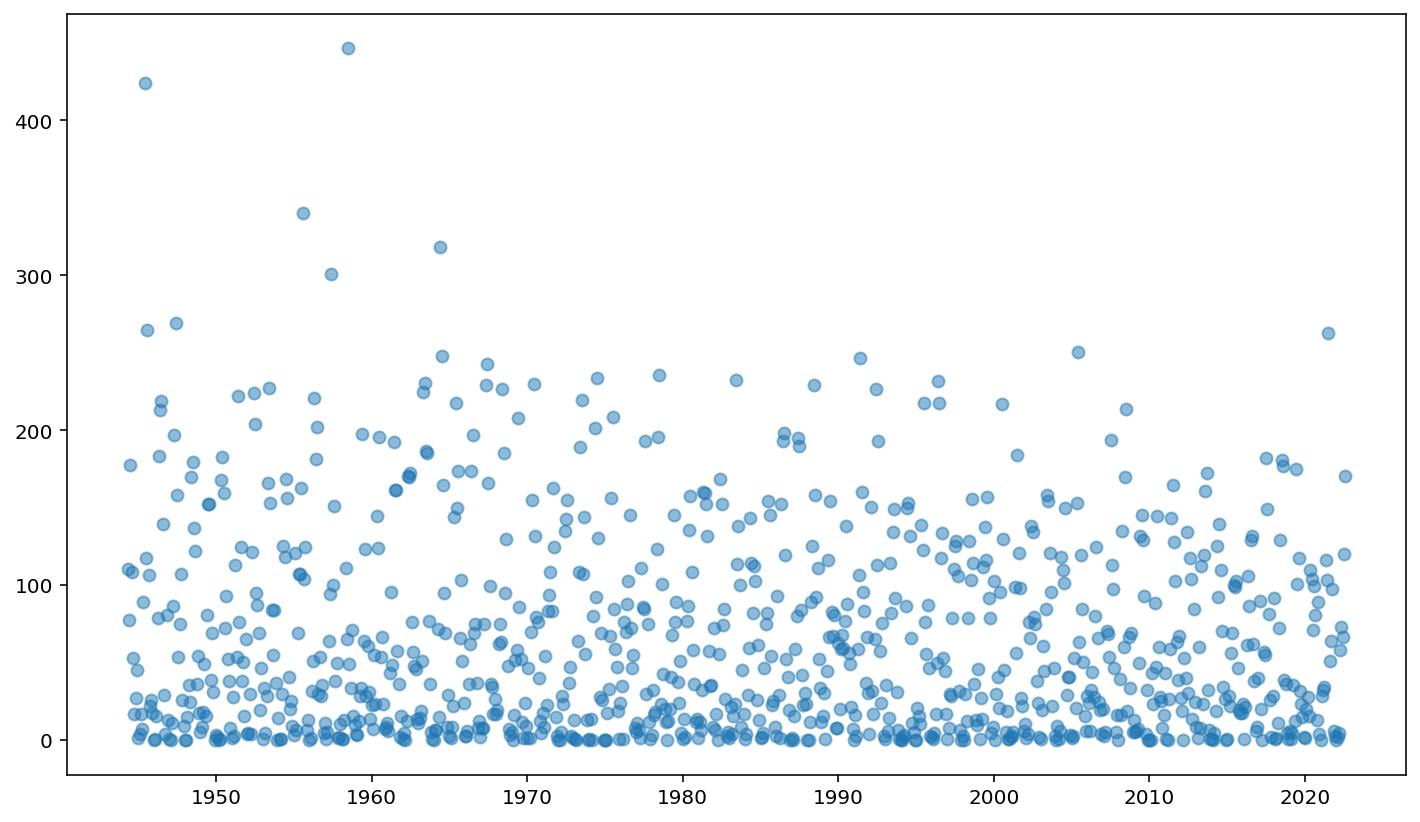

In [36]:
(months, rain, flags) = raindata("Airport")
plt.scatter(months,rain,alpha = 0.5)
plt.show()

### Comparing with averages

* Plot the data against a line showing the average rainfall (for the whole period) received at the weather station.

Can you see any trends?

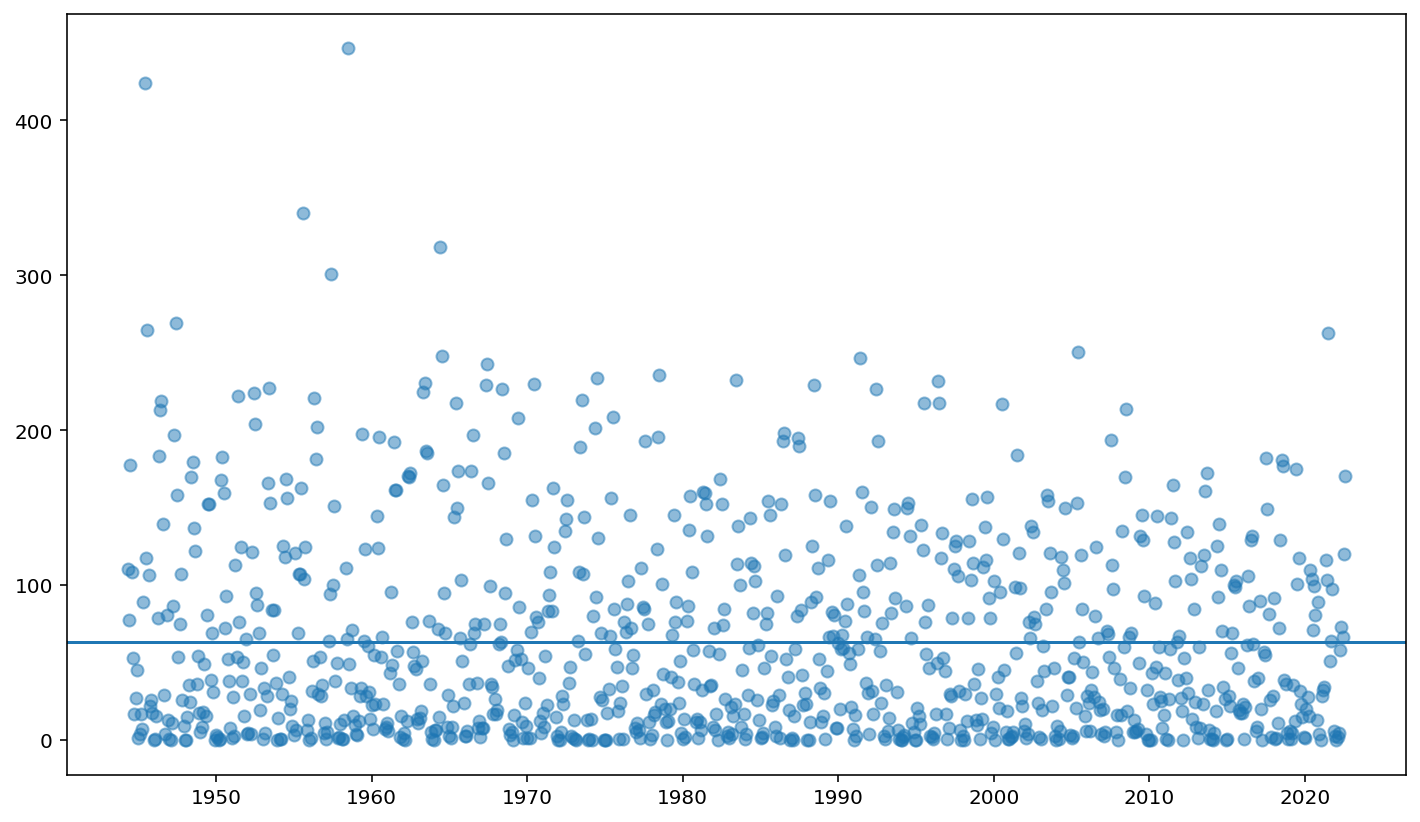

In [37]:
(months, rain, flags) = raindata("Airport")
plt.scatter(months,rain,alpha = 0.5)
plt.axhline(y=sum(rain)/len(rain))
plt.show()

* Create a boolean mask (over the months) that can be used to extract the data between 1950 inclusive and 1960 exclusive.

'Inclusive' means it includes 1950 (the interval is _closed_ on the left), 'exclusive' means it excludes 1960 (the interval is _open_ on the right).

You should use `datetime64` objects to set the boundaries.

In [38]:
mask = np.logical_and (months >= np.datetime64('1950-01'), months < np.datetime64('1960-01'))
mask[:5]


array([False, False, False, False, False])

* Use your mask to plot the rainfall for the 1950s, against the average for the 1950s.

You should see a regular pattern showing the seasonal cycles.


In [39]:
rain_1950s = rain[mask]
months_1950s = months[mask]

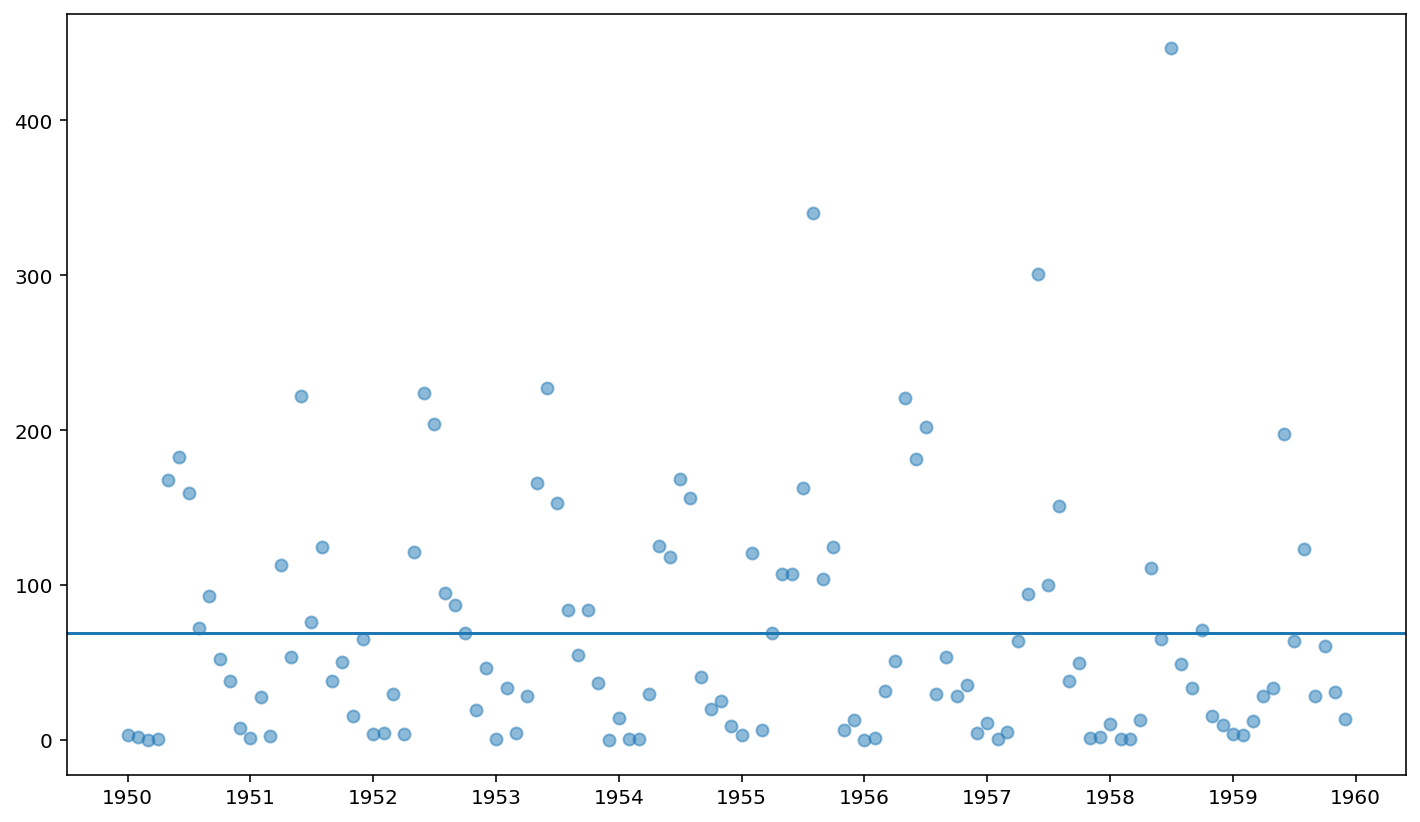

In [40]:
plt.scatter(months[mask],rain[mask],alpha = 0.5)
plt.axhline(y=sum(rain[mask])/len(rain[mask]))
plt.show()

Your boss says "I've changed my mind, I want to see the data from 1950 to 1951".

* Change your mask to meet the new spec and replot.

You shouldn't need to change anything except the mask - the plotting logic stays the same. Even though we haven't written a function (yet), this shows the power and elegance of reusable programming elements!

- Plot the last 10 years (September 2012 to August 2022) to see how this year compares.

In [41]:
mask_2 = np.logical_and (months >= np.datetime64('2012-09'), months < np.datetime64('2022-09'))

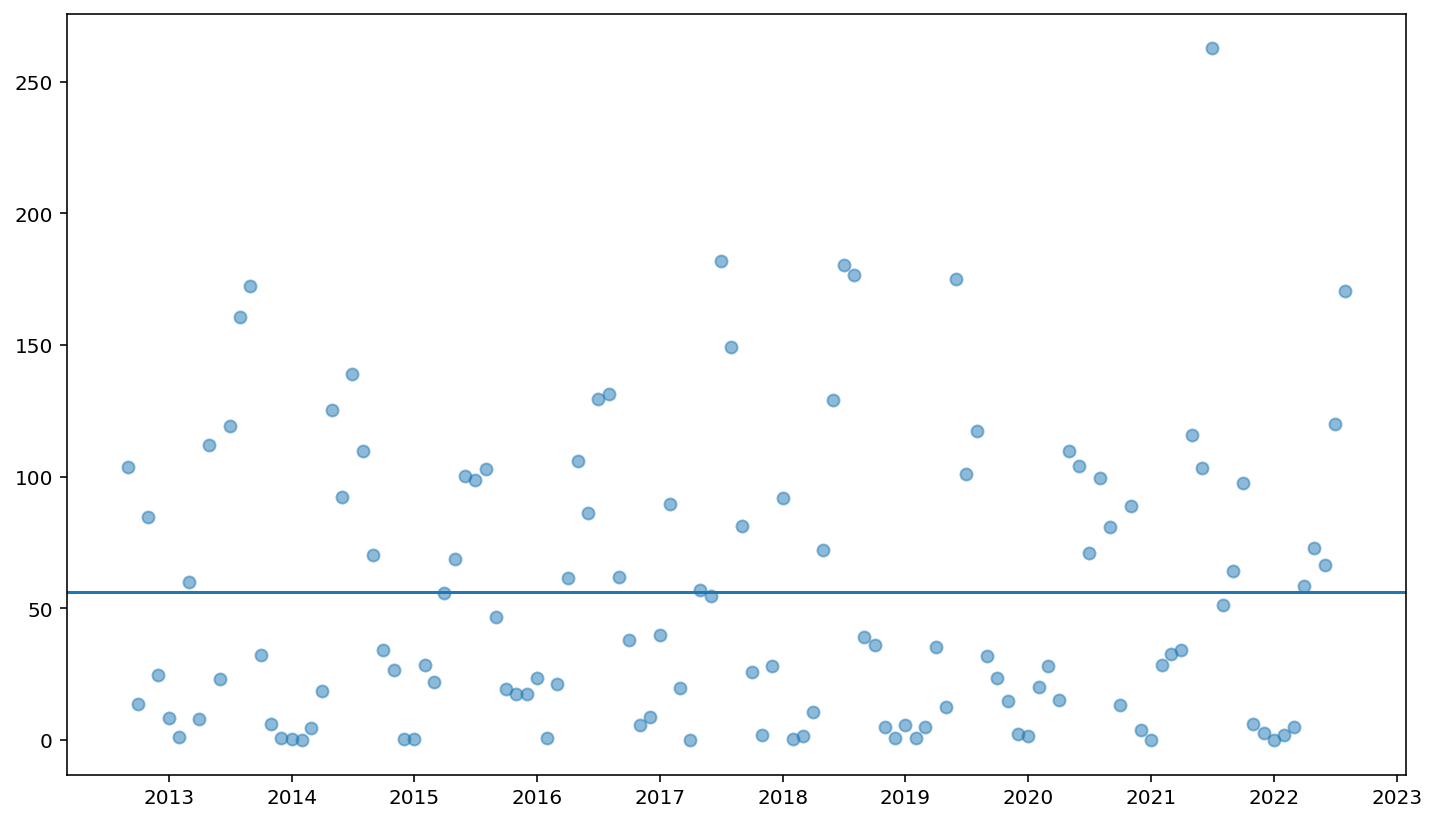

In [42]:
plt.scatter(months[mask_2],rain[mask_2],alpha = 0.5)
plt.axhline(y=sum(rain[mask_2])/len(rain[mask_2]))
plt.show()

### Decadal Averages

We're going to plot averages for a number of decades, so let's go ahead and write a function.

* Write a function `get_averages(months, rain, first, last)` that:
   * takes the `months` and `rain` arrays and two datetimes, `first` and `last`
   * if there is at least one data point in the range, returns a pair `(selected_months, avs)` where
     * `selected_months` are those months that lie between first (inclusive) and last (exclusive)
     * `avs` is an array of values the same size as `selected_months`, which are all the same and are equal to the average rainfall over that period
   * raises a `ValueError` with the message "No data in date range." if there is no data in the specified range

As always, you should check your code on some values to satisfy yourself that it works.

In [43]:
def get_averages(months, rain, first, last):
    my_mask = np.logical_and (months >= first, months < last)
    selected_months = months[my_mask]
    if len(selected_months) != 0:
        avs = np.mean(rain[my_mask]) * np.ones_like(rain[my_mask])
    else:
        raise ValueError('No data in date range.')
    return(selected_months, avs)


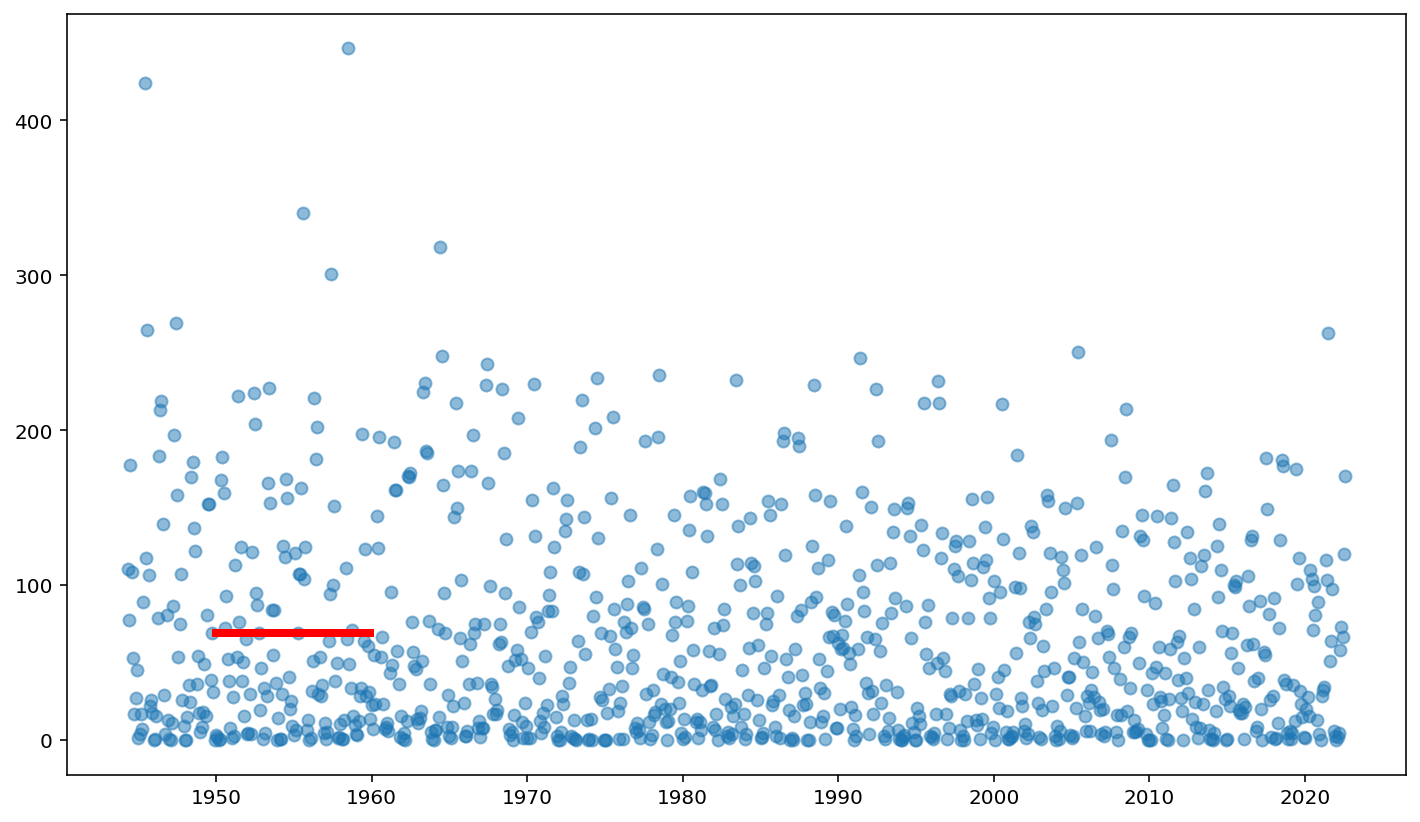

In [44]:
(months, rain, flags) = raindata("Airport")

result1, result2 = get_averages(months, rain, np.datetime64("1950"), np.datetime64("1960"))

plt.scatter(months,rain,alpha = 0.5)
plt.plot(result1,result2, color = "red", linewidth=4)
plt.show()


* Generate your plot again, but this time use the above method to get the average between 1950 and 1960 and plot that as a line on the graph.

Increase the default width of the average line so its easier to see. Your plot should now look like this:

<div>
<img src="airport50-60.png" width="600">
</div>


#### Setting up the iteration

* Use `arange` (one line) to generate an array containing all the decade start dates from 1940 to 2020 (including 2020).

Your array might look like this:

```    array(['1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020'], dtype='datetime64[Y]')```

Note that by the "decades" in the following, we mean intervals starting with a year divisible by 10 (not, for example, 1942 to 1952).

In [45]:
decade_1940_2020 = np.arange("1940", "2021", "10", dtype='datetime64[Y]')
decade_1940_2020

array(['1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010',
       '2020'], dtype='datetime64[Y]')

* Using this array as an iterable, successively call `get_averages` to get the average values for each decade, and successively plot each decade's average on your scatter plot.

Can you see any trend yet?

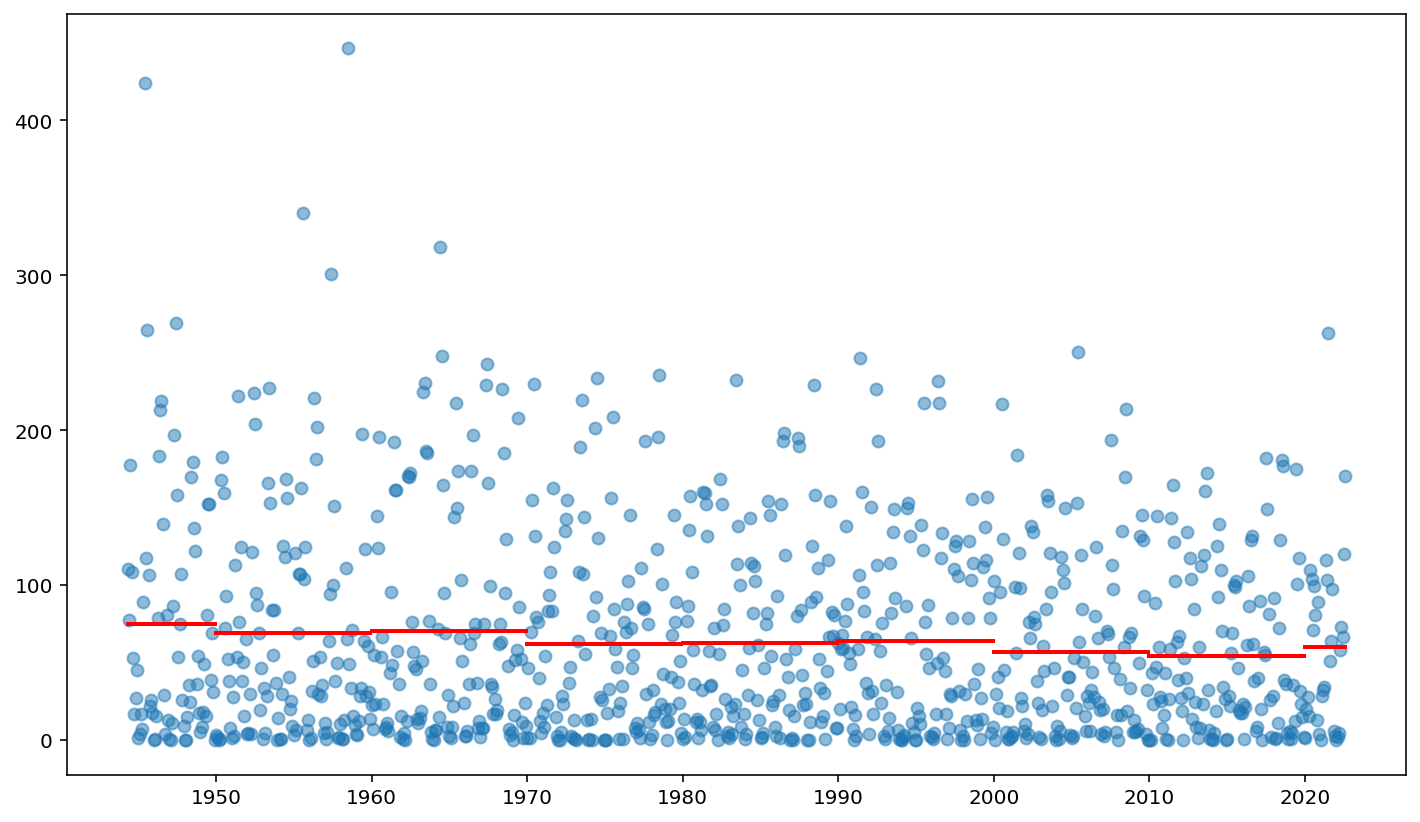

In [46]:
(months, rain, flags) = raindata("Airport")


plt.scatter(months,rain,alpha = 0.5)

for item in decade_1940_2020:
    result1, result2 = get_averages(months, rain, item, item+10)
    plt.plot(result1,result2, color = "red", linewidth=2)
plt.show()    



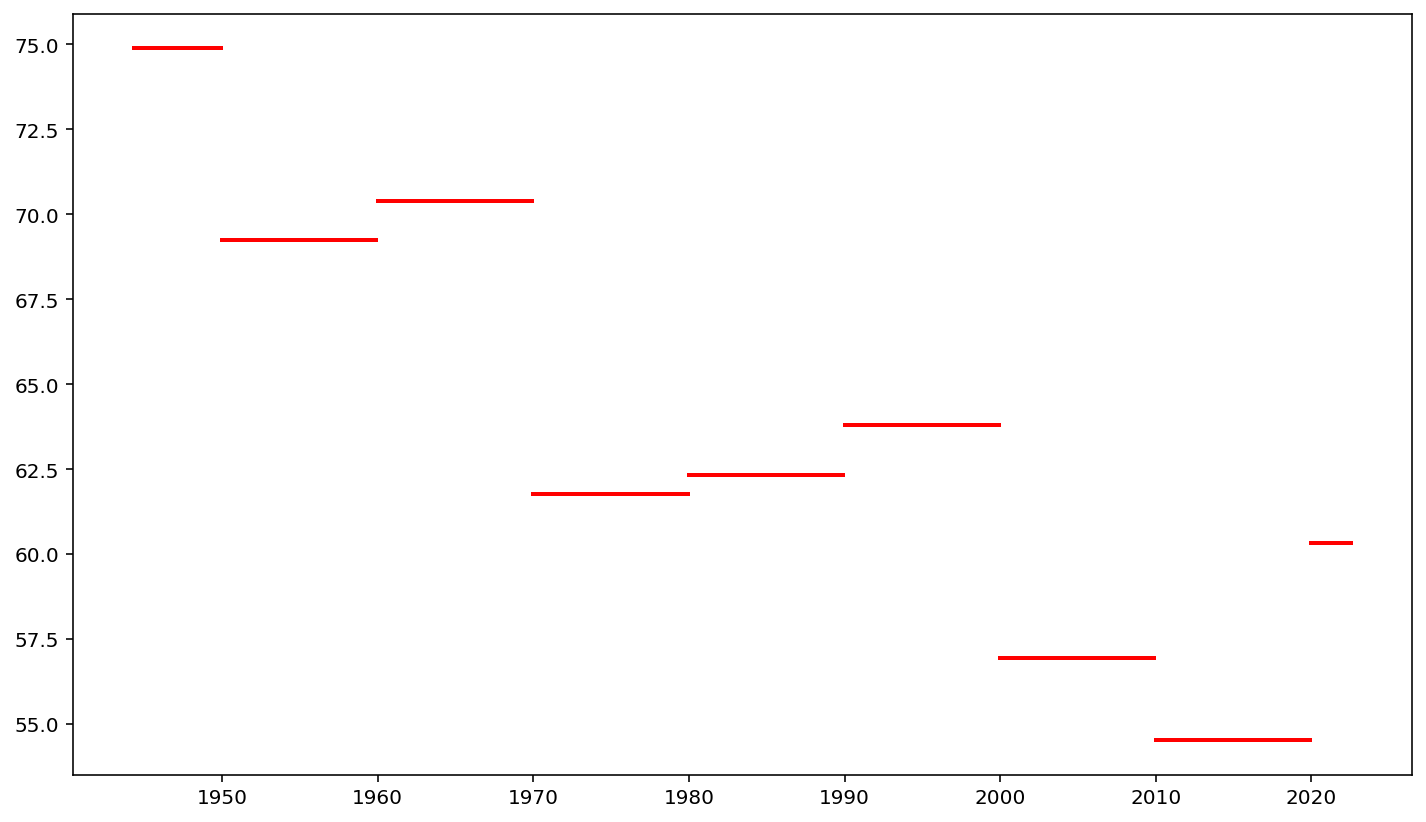

In [47]:
(months, rain, flags) = raindata("Airport")

for item in decade_1940_2020:
    result1, result2 = get_averages(months, rain, item, item+10)
    plt.plot(result1,result2, color = "red", linewidth=2)
plt.show()    


* To get a better scale, plot just the decadal averages on their own (without the scatter plot).

Can you see a general trend?

#### Q2. Accumulating the decadal means [2 lab marks]

Write a function `all_decades (site, months, rain)` that returns two arrays, one of x-values and one of y-values, that can be used to plot a single (stepwise) line of all the decadal averages as follows:
    
```
(mean_xs, mean_ys) = all_decades(site, months, rain)
plt.plot(mean_xs, mean_ys)
plt.show()
```

Here `mean_xs` should be dates (datetime64) and `mean_ys` should be average rainfall in mms (float).

Note that it should work with months and rain that are different to those in the airport data. Therefore the first and last decades must be determined from the values in `months`.

As usual you may break it down into more than one function if you wish.

_Once you have finished testing, please clear the kernel output before submission to clear the images._

In [48]:
def all_decades (months, rain):
    first_decades_start = np.datetime64(np.datetime64(months[1],"Y").astype(str)[:-1]+"0")
    decadal_array = np.arange(first_decades_start, months[-1], "10", dtype='datetime64[Y]')
    my_list = []
    for item in decadal_array:
        selected_months, average = get_averages(months, rain, item, item+10)
        my_list.extend(average.tolist()) 
    return months, np.array(my_list)

    

In [50]:
from nose.tools import assert_equal, assert_almost_equal, assert_true
(months, rain, flags) = raindata("Airport")
(mean_xs, mean_ys) = all_decades(months, rain)
assert_equal(mean_xs[100], np.datetime64('1952-09'))
assert_almost_equal(mean_ys[100], 69.24833333333332)
print("So far so good, additional tests will be applied.")


So far so good, additional tests will be applied.


In [51]:
## Marking use only

* Plot the average rainfall line.

By now you should see a pretty clear trend!

In [52]:
#(months, rain, flags) = raindata("Midland")
#(mean_xs, mean_ys) = all_decades(months, rain)
#first_decades_start = np.datetime64(np.datetime64(months[1],"Y").astype(str)[:-1]+"0")
#decadal_array = np.arange(first_decades_start, months[-1], "10", dtype='datetime64[Y]')
#decadal_array
#months

### Flags

So far we have not taken into account the flags that indicate the data that has completed checking.

* Create a new plot of the decadal means so that it plots a green line where all data that has fully verified (flag 'Y'), and an amber (orange) line where data requires further verification (flag 'N'). Include a legend that informs the reader of what the colours mean.

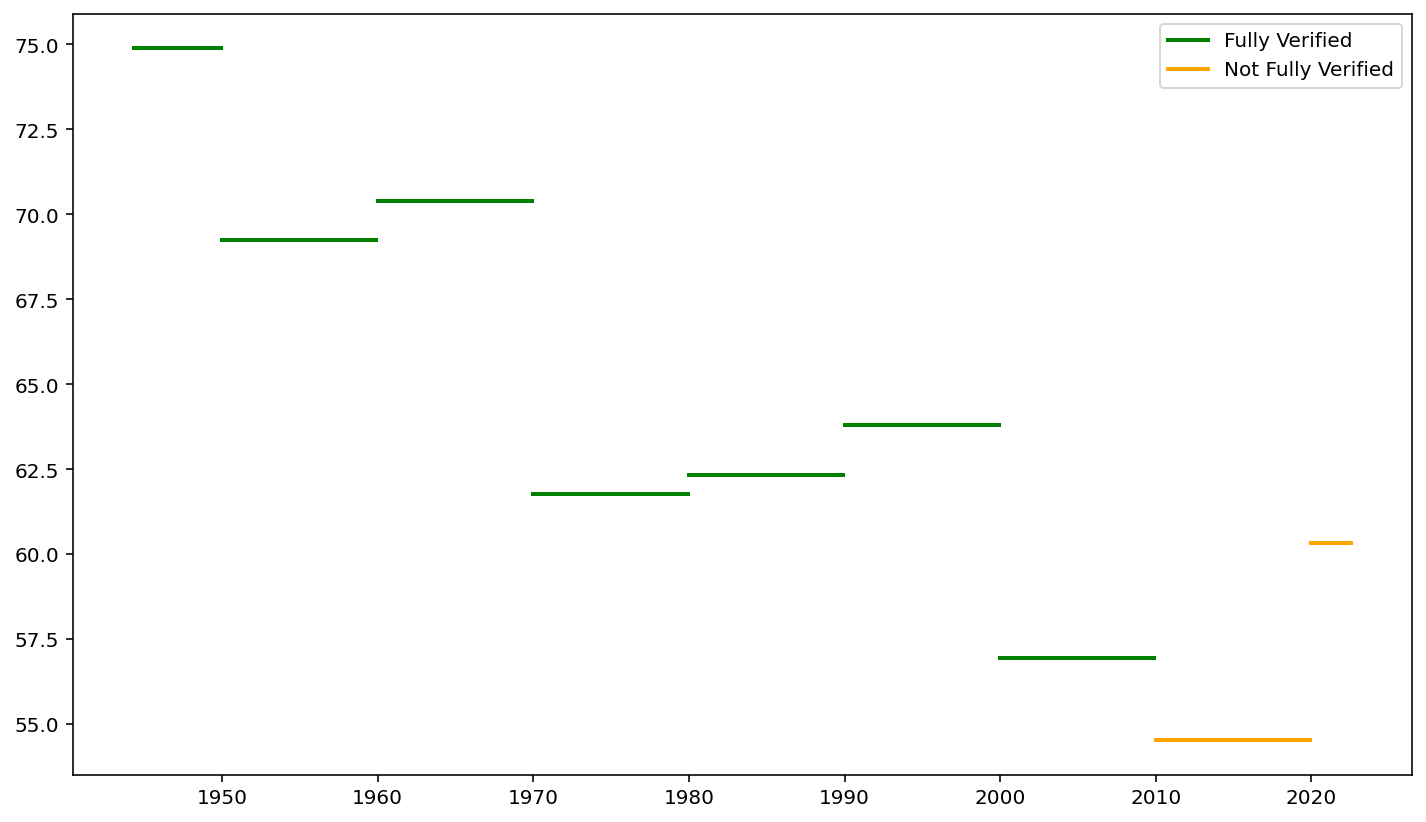

In [59]:
(months, rain, flags) = raindata("Airport")
(result_x, result_y) = all_decades(months, rain)

first_decades_start = np.datetime64(np.datetime64(months[1],"Y").astype(str)[:-1]+"0")
decadal_array = np.arange(first_decades_start, months[-1], "10", dtype='datetime64[Y]')


for item in decadal_array:
    result1, result2 = get_averages(months, rain, item, item+10)
    my_mask = np.logical_and (months >= item, months < item+10)
    if flags[my_mask].all():
        verified = plt.plot(result1,result2, color = "Green", linewidth=2)
        
    else:
        non_verified = plt.plot(result1,result2, color = "Orange", linewidth=2)

plt.legend([verified[0],non_verified[0]],['Fully Verified',"Not Fully Verified"],loc='best')
plt.show()


        
#handles, labels = plt.gca().get_legend_handles_labels()
#labels, ids = np.unique(labels, return_index=True)
#handles = [handles[i] for i in ids]
#plt.legend(handles, labels, loc='best')


### Midland weather station data

We saw from our initial inspection that the Midland data has missing portions.

* Plot a line of decadal averages for the Midland data. This time use green for verified data, orange for unverified data, and red for any periods containing missing (empty) flags or missing data.



In [61]:
def new_get_averages(complete_months, months, rain, first, last):
    my_mask_1 = np.logical_and (months >= first, months < last)
    my_mask_2 = np.logical_and (complete_months >= first, complete_months < last)
    selected_months = months[my_mask_1]
    selected_complete_months = complete_months[my_mask_2]
    avs = np.mean(rain[my_mask]) * np.ones(len(selected_complete_months))
    return(selected_months, selected_complete_months, avs)



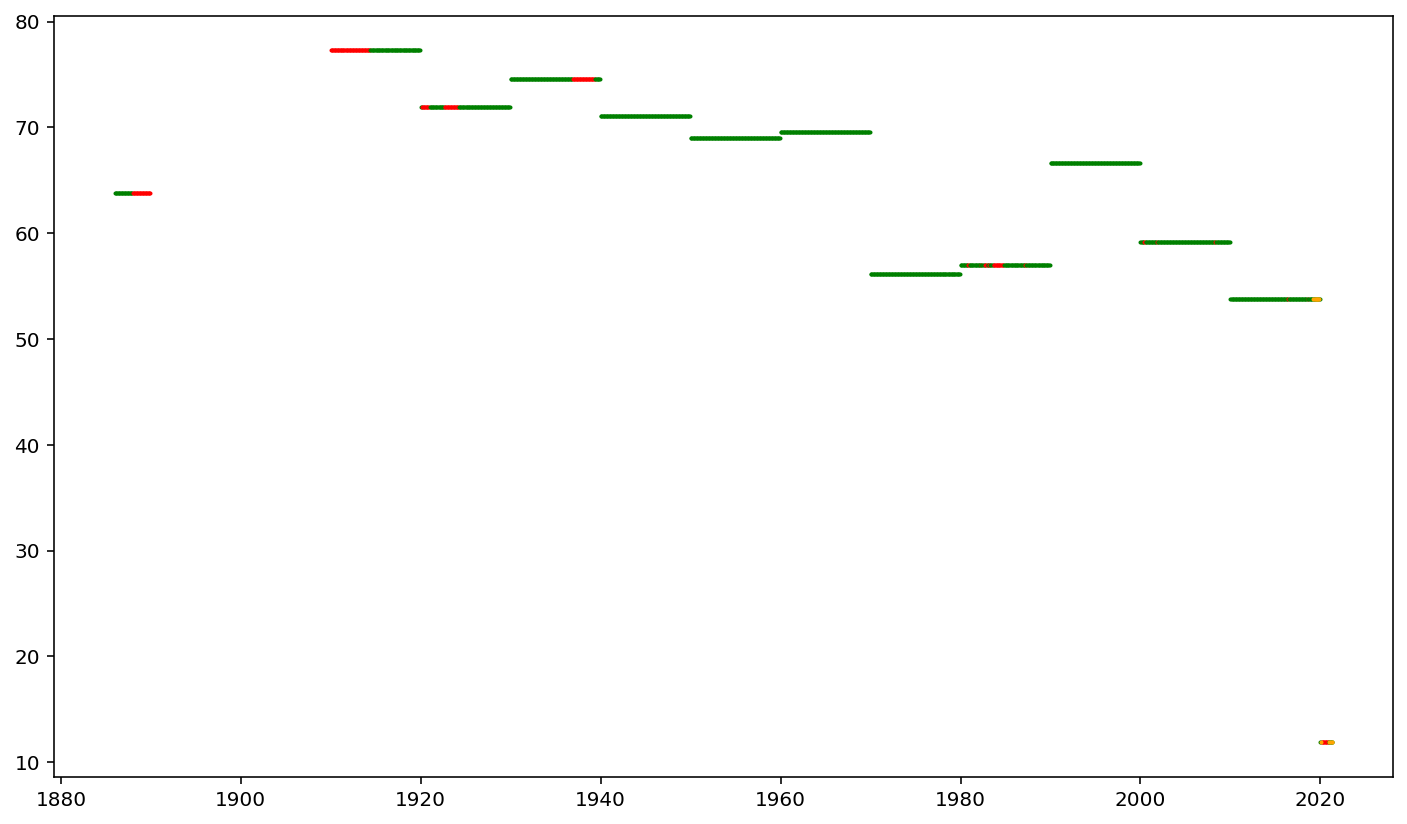

In [64]:
(months, rain, flags) = raindata("Midland")

first_decades_start = np.datetime64(np.datetime64(months[1],"Y").astype(str)[:-1]+"0")
decadal_array = np.arange(first_decades_start, months[-1], "10", dtype='datetime64[Y]')

complete_months = np.arange(months[0],months[-1]+1,dtype='datetime64[M]')

for item in decadal_array:
    my_mask = np.logical_and (months >= item, months < item+10)
    color_choice = lambda x: 'Green' if x is True else 'Red'
    if len(months[my_mask])!=0:
        result1, result2,result3 = new_get_averages(complete_months, months,rain, item, item+10)
        for item in result2:
            plt.scatter(item, result3[0],1, color = color_choice(item in result1 ))   
        unverified_x_value = result1[~flags[my_mask]]
        unverified_y_value = result3[0]* np.ones(len(unverified_x_value))
        plt.scatter(unverified_x_value,unverified_y_value,1,color = "Orange")

plt.show()

## Putting it all together

* Finally, plot the Midland and Perth Airport decadal lines on the same plot, using the 'traffic light' (red, orange, green) colour scheme, along with a legend.

What observations can you make?

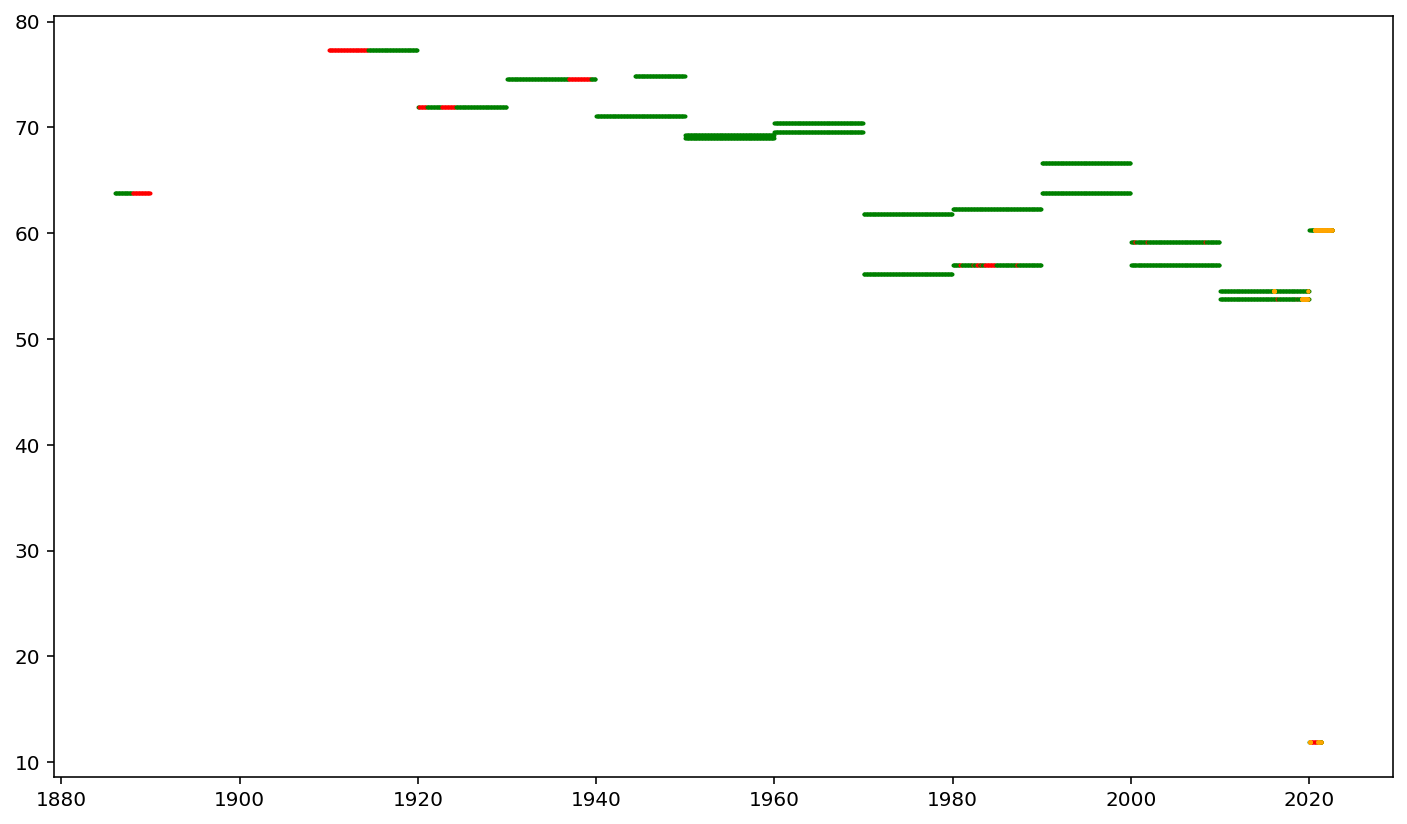

In [56]:
for keys in STATIONS:
    (months, rain, flags) = raindata(keys)
    first_decades_start = np.datetime64(np.datetime64(months[1],"Y").astype(str)[:-1]+"0")
    decadal_array = np.arange(first_decades_start, months[-1], "10", dtype='datetime64[Y]')
    complete_months = np.arange(months[0],months[-1]+1,dtype='datetime64[M]')
    for item in decadal_array:
        my_mask = np.logical_and (months >= item, months < item+10)
        color_choice = lambda x: 'Green' if x is True else 'Red'
        if len(months[my_mask])!=0:
            result1, result2,result3 = new_get_averages(complete_months, months,rain, item, item+10)
            for item in result2:
                plt.scatter(item, result3[0],1, color = color_choice( item in result1 ))   
                unverified_x_value = result1[~flags[my_mask]]
                unverified_y_value = result3[0]* np.ones(len(unverified_x_value))
                plt.scatter(unverified_x_value,unverified_y_value,1,color = "Orange")

plt.show()

In [57]:
    #if len(months[my_mask])==0:
        #plt.hlines(y=0, xmin=item, xmax=item+10, colors='red')
        #print(item, len(months[my_mask]),flags[my_mask].all())

&copy; Cara MacNish, UWA